<a href="https://colab.research.google.com/github/GSP31/GSP31/blob/main/P222A034_ML2Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Name : Gaurav Patil

## Roll Num : P222A034

## Section : A

## Project: Predict COVID-19 among suspected patients (depedent var: corona_result).

### Instructions:

* The are five broad steps to be followed (given in 'Questions' section). Before each step mention the Step number.
* Submit the same notebook file only on Olympus.
* Write brief description after every operation/step.
* Last date for submiting the project is: 12 Feb 2023 (EoD)
* Submisions sent by email will not be accepted



# Questions

Solve the predictive problem using Crisp DM model by following the given steps:

1. Data wrangling, data cleaning, feature engineering, EDA etc            (5 marks) (CLO 1)

2. Prediction using various ML models (Decision trees, Random Forests, Support Vector machines)   (5 marks) (CLO 1)

2. Check overfiting and reduce/avoid it using various techniques.      (5 marks) (CLO 2)

3. Tune models and improve accuracy of all models used earlier.     (10 marks) (CLO 3)

4. Compare the reuslts of all models and write your final observations.     (5 marks) (CLO 2)




# <center> Covid19 Prediction using symptoms

In [ ]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
#STEP-2: Autheticate E-Mail ID

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
#STEP-3: Get File from Drive using file-ID

#2.1 Get the file
downloaded = drive.CreateFile({'id':'13lViCvVNr3gXKrzJHI2nSZYeTc3Yf-yd'}) # replace the id with id of file you want to access
downloaded.GetContentFile('covid_symptoms.csv')

# Importing libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import pylab as pl
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn. ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
import warnings
warnings.filterwarnings("ignore")


import

# Reading dataset

In [ ]:
df=pd.read_csv("covid_symptoms.csv")

In [ ]:
df.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,1.0,0.0,0.0,0.0,0.0,0.0,No,Male,Other
1,1.0,1.0,0.0,0.0,0.0,0.0,No,Male,Abroad
2,0.0,1.0,0.0,0.0,0.0,0.0,Yes,Male,Contact with confirmed
3,1.0,1.0,0.0,0.0,0.0,1.0,Yes,Male,Abroad
4,1.0,0.0,0.0,0.0,0.0,0.0,Yes,Female,Contact with confirmed


# **Q1**

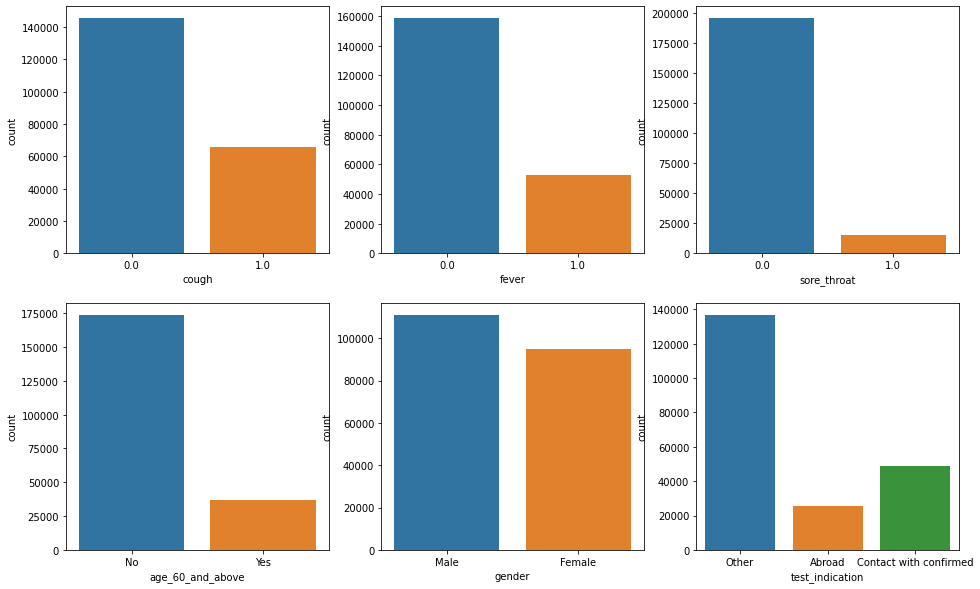

In [ ]:
fig , axes = plt.subplots(2, 3, figsize = (16,10) )
sns.countplot('cough' , data = df, ax = axes[0,0])
sns.countplot('fever' , data = df, ax = axes[0,1])
sns.countplot('sore_throat' , data = df, ax = axes[0,2])
sns.countplot('age_60_and_above' , data = df, ax = axes[1,0])
sns.countplot('gender' , data = df, ax = axes[1,1])
sns.countplot('test_indication' , data = df, ax = axes[1,2])


- We see here that Each of symptoms has few confirmed patients comparatively while people with cough are highest in number
- Males are more compared to females
- Test indication shows other has highest count compared to abroad and contact with confirmed

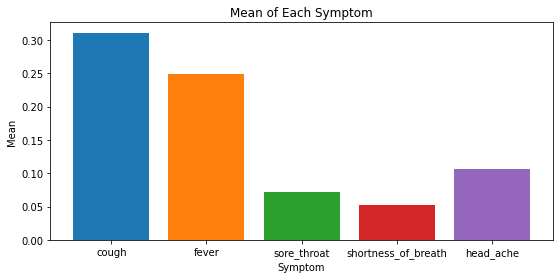

In [ ]:
# Plot a barplot of the mean of each symptom
plt.figure(figsize = (9 ,4))
symptoms = ['cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache']
for symptom in symptoms:
    mean = df[symptom].mean()
    plt.bar(symptom, mean)
plt.xlabel("Symptom")
plt.ylabel("Mean")
plt.title("Mean of Each Symptom")
plt.show()

## **Among all of the symptoms More patients reported coughing, which was followed by fever.**

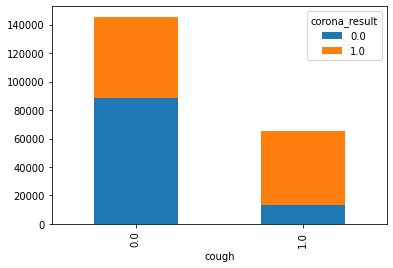

In [ ]:
df_plot = df.groupby(['corona_result', 'cough']).size().reset_index().pivot(columns='corona_result', index='cough', values=0)
df_plot.plot(kind='bar', stacked=True)

## **Patients who were suffering from cough had comparatively more Corona patients than the ones who were not having Cough**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211429 entries, 0 to 211428
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   cough                211186 non-null  float64
 1   fever                211186 non-null  float64
 2   sore_throat          211186 non-null  float64
 3   shortness_of_breath  211186 non-null  float64
 4   head_ache            211186 non-null  float64
 5   corona_result        211186 non-null  float64
 6   age_60_and_above     211186 non-null  object 
 7   gender               206058 non-null  object 
 8   test_indication      211186 non-null  object 
dtypes: float64(6), object(3)
memory usage: 14.5+ MB


In [ ]:
df.isnull().sum()

cough                   243
fever                   243
sore_throat             243
shortness_of_breath     243
head_ache               243
corona_result           243
age_60_and_above        243
gender                 5371
test_indication         243
dtype: int64

In [ ]:
new_df = df

In [ ]:
new_df['cough'] = new_df['cough'].fillna(new_df['cough'].mode()[0])
new_df['fever'] = new_df['fever'].fillna(new_df['fever'].mode()[0])
new_df['sore_throat'] = new_df['sore_throat'].fillna(new_df['sore_throat'].mode()[0])
new_df['shortness_of_breath'] = new_df['shortness_of_breath'].fillna(new_df['shortness_of_breath'].mode()[0])
new_df['head_ache'] = new_df['head_ache'].fillna(new_df['head_ache'].mode()[0])
new_df['corona_result'] = new_df['corona_result'].fillna(new_df['corona_result'].mode()[0])
new_df['age_60_and_above'] = new_df['age_60_and_above'].fillna(new_df['age_60_and_above'].mode()[0])
new_df['gender'] = new_df['gender'].fillna(new_df['gender'].mode()[0])
new_df['test_indication'] = new_df['test_indication'].fillna(new_df['test_indication'].mode()[0])

*Lable encoding the variables where only two categories are involved*

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

LE = LabelEncoder()

In [ ]:
new_df['age_60_and_above'] = LE.fit_transform(new_df['age_60_and_above'])
new_df['gender'] = LE.fit_transform(new_df['gender'])


one hot encoding test_indication variable since it has three categories


In [ ]:
new_df = pd.get_dummies(new_df, columns = ['test_indication'])

In [ ]:
new_df.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication_Abroad,test_indication_Contact with confirmed,test_indication_Other
0,1.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1
1,1.0,1.0,0.0,0.0,0.0,0.0,0,1,1,0,0
2,0.0,1.0,0.0,0.0,0.0,0.0,1,1,0,1,0
3,1.0,1.0,0.0,0.0,0.0,1.0,1,1,1,0,0
4,1.0,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0


In [ ]:
new_df['cough'] = new_df.cough.astype('category')
new_df['fever'] = new_df.fever.astype('category')
new_df['sore_throat'] = new_df.sore_throat.astype('category')
new_df['shortness_of_breath'] = new_df.shortness_of_breath.astype('category')
new_df['head_ache'] = new_df.head_ache.astype('category')
new_df['corona_result'] = new_df.corona_result.astype('category')
new_df['age_60_and_above'] = new_df.age_60_and_above.astype('category')
new_df['gender'] = new_df.gender.astype('category')

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211429 entries, 0 to 211428
Data columns (total 11 columns):
 #   Column                                  Non-Null Count   Dtype   
---  ------                                  --------------   -----   
 0   cough                                   211429 non-null  category
 1   fever                                   211429 non-null  category
 2   sore_throat                             211429 non-null  category
 3   shortness_of_breath                     211429 non-null  category
 4   head_ache                               211429 non-null  category
 5   corona_result                           211429 non-null  category
 6   age_60_and_above                        211429 non-null  category
 7   gender                                  211429 non-null  category
 8   test_indication_Abroad                  211429 non-null  uint8   
 9   test_indication_Contact with confirmed  211429 non-null  uint8   
 10  test_indication_Other           

# **Q2,Q3,Q4,Q5**

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
X = new_df.drop('corona_result', axis=1)
y = new_df['corona_result']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## **Decision tree**

In [ ]:
clf = DecisionTreeClassifier()

In [ ]:
clf = clf.fit(X_train,y_train)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
#Confusion Matrix
results = confusion_matrix(y_test, y_pred)

print ("Confusion Matrix of test data:")
print(results)

Confusion Matrix of test data:
[[27783  2837]
 [ 6169 26640]]


In [ ]:
rep = classification_report(y_test,y_pred)
print ("Report of test data:")
print(rep)

Report of test data:
              precision    recall  f1-score   support

         0.0       0.82      0.91      0.86     30620
         1.0       0.90      0.81      0.86     32809

    accuracy                           0.86     63429
   macro avg       0.86      0.86      0.86     63429
weighted avg       0.86      0.86      0.86     63429



## The accuracy of decision tree is 86%

# **Tuning Decision tree by bagging and boosting**

# **Bagging**

In [ ]:
bg = BaggingClassifier(DecisionTreeClassifier(), max_samples= 0.8, n_estimators = 10)

In [ ]:
bg.fit(X_train,y_train)
print('Test score',bg.score(X_test,y_test))

Test score 0.8580144728751833


#**Boosting**

In [ ]:
adb = AdaBoostClassifier(DecisionTreeClassifier(),n_estimators = 10, learning_rate = 1)

In [ ]:
adb.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=1,
                   n_estimators=10)

In [ ]:
print('Boosting score on test',adb.score(X_test,y_test))

Boosting score on test 0.8580144728751833


## **We see here bagging and boosting does not improve the accuracy much both techniques touches accuracy at 85.8%**

## **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier(max_features=9, n_estimators=100)

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_features=9)

In [ ]:
print('Accuracy of training set', rf.score(X_train, y_train))

Accuracy of training set 0.858027027027027


In [ ]:
print('Accuracy of test set::', rf.score(X_test, y_test))

Accuracy of test set:: 0.8580144728751833


In [ ]:
Y_pred = rf.predict(X_test)
print('Accuracy of test set (2nd method)',accuracy_score(Y_pred, y_test))

Accuracy of test set (2nd method) 0.8580144728751833


## Accuracy of random forest is 85.801% without tuning

## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
import numpy as np

max_features_range = np.arange(1,5,1)
n_estimators_range = np.arange(10,80,10)
param_grid = dict(max_features=max_features_range, n_estimators=n_estimators_range)

rf = RandomForestClassifier()

grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3)

In [ ]:
grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_features': array([1, 2, 3, 4]),
                         'n_estimators': array([10, 20, 30, 40, 50, 60, 70])})

*best parameter*

In [ ]:
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'max_features': 1, 'n_estimators': 10} with a score of 0.86


In [ ]:
grid_results = pd.concat([pd.DataFrame(grid.cv_results_["params"]),pd.DataFrame(grid.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)

In [ ]:
grid_contour = grid_results.groupby(['max_features','n_estimators']).mean()
grid_contour

Accuracy
max_features n_estimators          
1            10            0.857804
             20            0.857804
             30            0.857804
             40            0.857804
             50            0.857804
             60            0.857804
             70            0.857804
2            10            0.857709
             20            0.857804
             30            0.857804
             40            0.857804
             50            0.857804
             60            0.857804
             70            0.857804
3            10            0.857804
             20            0.857804
             30            0.857804
             40            0.857804
             50            0.857804
             60            0.857804
             70            0.857804
4            10            0.857804
             20            0.857716
             30            0.857804
             40            0.857804
             50            0.857804
             60            0.857804
             70            0.857804

In [ ]:
grid_reset = grid_contour.reset_index()
grid_reset.columns = ['max_features', 'n_estimators', 'Accuracy']
grid_pivot = grid_reset.pivot('max_features', 'n_estimators')
grid_pivot

Accuracy                                                    \
n_estimators        10        20        30        40        50        60   
max_features                                                               
1             0.857804  0.857804  0.857804  0.857804  0.857804  0.857804   
2             0.857709  0.857804  0.857804  0.857804  0.857804  0.857804   
3             0.857804  0.857804  0.857804  0.857804  0.857804  0.857804   
4             0.857804  0.857716  0.857804  0.857804  0.857804  0.857804   

                        
n_estimators        70  
max_features            
1             0.857804  
2             0.857804  
3             0.857804  
4             0.857804

In [ ]:
a = grid_pivot.columns.levels[1].values
b = grid_pivot.index.values
c = grid_pivot.values

In [ ]:
import plotly.graph_objects as go

# X and Y axes labels
layout = go.Layout(
            xaxis=go.layout.XAxis(
              title=go.layout.xaxis.Title(
              text='n_estimators')
             ),
             yaxis=go.layout.YAxis(
              title=go.layout.yaxis.Title(
              text='max_features')
            ) )

### **3D SURFACE PLOT**

In [ ]:
import plotly.graph_objects as go


fig = go.Figure(data= [go.Surface(z=c, y=b, x=a)], layout=layout)
fig.update_layout(title='Hyperparameter tuning',
                  scene = dict(
                    xaxis_title='n_estimators',
                    yaxis_title='max_features',
                    zaxis_title='Accuracy'),
                  autosize=False,
                  width=800, height=800,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

In [ ]:
Y_pred = grid.predict(X_test)
grid.score(X_test, y_test)

0.8580144728751833

## So we can see that after tuning there is not much change in accuracy for random forest it is 85.801 % only

# **SVM**

In [ ]:
model = SVC()

In [ ]:
model.fit(X_train, y_train)

SVC()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,y_pred))

[[27782  2838]
 [ 6169 26640]]


In [ ]:
rep = classification_report(y_test, y_pred)
print ("Report of test data:")
print(rep)

Report of test data:
              precision    recall  f1-score   support

         0.0       0.82      0.91      0.86     30620
         1.0       0.90      0.81      0.86     32809

    accuracy                           0.86     63429
   macro avg       0.86      0.86      0.86     63429
weighted avg       0.86      0.86      0.86     63429



## **HYPER PARAMETER TUNING**

In [ ]:
# defining parameter range
param_grid = {'C': [0.1,1,10],
              'gamma': [10,1],
              'kernel': ['rbf']}

In [ ]:
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3, cv=2)

In [ ]:
grid.fit(X_train, y_train)

Fitting 2 folds for each of 6 candidates, totalling 12 fits
[CV 1/2] END .......C=0.1, gamma=10, kernel=rbf;, score=0.858 total time= 3.0min
[CV 2/2] END .......C=0.1, gamma=10, kernel=rbf;, score=0.857 total time= 3.0min
[CV 1/2] END ........C=0.1, gamma=1, kernel=rbf;, score=0.858 total time= 3.0min
[CV 2/2] END ........C=0.1, gamma=1, kernel=rbf;, score=0.857 total time= 3.0min
[CV 1/2] END .........C=1, gamma=10, kernel=rbf;, score=0.858 total time= 3.0min
[CV 2/2] END .........C=1, gamma=10, kernel=rbf;, score=0.857 total time= 3.1min
[CV 1/2] END ..........C=1, gamma=1, kernel=rbf;, score=0.858 total time= 3.0min
[CV 2/2] END ..........C=1, gamma=1, kernel=rbf;, score=0.857 total time= 3.0min
[CV 1/2] END ........C=10, gamma=10, kernel=rbf;, score=0.858 total time= 3.0min
[CV 2/2] END ........C=10, gamma=10, kernel=rbf;, score=0.857 total time= 3.1min
[CV 1/2] END .........C=10, gamma=1, kernel=rbf;, score=0.858 total time= 3.0min
[CV 2/2] END .........C=10, gamma=1, kernel=rbf;,

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [10, 1],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
print(grid.best_params_)

{'C': 0.1, 'gamma': 10, 'kernel': 'rbf'}


In [ ]:
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

SVC(C=0.1, gamma=10)


In [ ]:
grid_predictions = grid.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,grid_predictions))

[[27782  2838]
 [ 6169 26640]]


In [ ]:
rep = classification_report(y_test, grid_predictions)
print ("Report of test data:")
print(rep)

Report of test data:
              precision    recall  f1-score   support

         0.0       0.82      0.91      0.86     30620
         1.0       0.90      0.81      0.86     32809

    accuracy                           0.86     63429
   macro avg       0.86      0.86      0.86     63429
weighted avg       0.86      0.86      0.86     63429



## After tuning SVM also we did not improve the model much our accuracy stays at 86% only

## So comparing all the techniques and from the result available we may use the SVM model without tuning
*Note: Though giving more time and using more computational power in tuning SVM result might give the better accuracy*